<a href="https://colab.research.google.com/github/guowindy/ExData_Plotting1/blob/master/SAE_FNN_Code_DataJune20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X. Yu, H. Lu, Q. Liu, Deep-learning-based regression model and hyperspectral
imaging for rapid detection of nitrogen concentration in oilseed rape (Brassica napus L.) leaf,
Chemometrics and Intelligent Laboratory Systems (2018), doi: 10.1016/j.chemolab.2017.12.010.

In [35]:
from google.colab import drive
drive.mount('/content/drive')
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
 CNN_book_weixs.pdf			 foo.txt
'Colab Notebooks'			'Getting started.pdf'
 DeepLearningCoursera30Oct19		 mlss2018-madrid-gan-master
 deep-learning-keras-tensorflow-master	 NIR
 Deep-Learning-with-Keras-master	 NLPinTF_coursera29Oct19
 demomcr.ipynb


In [7]:
import os
import gzip
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import six.moves.cPickle as pickle
import csv
os.chdir(r"/content/drive/My Drive/Colab Notebooks/chemo_SAE-FNN_NIR_HSI_June20/data/train_pixels/")

with gzip.open("ramdonpixel_train.pkl.gz", 'rb') as f:
    train_set1, valid_set1 = pickle.load(f)
    print('data size: ', len(train_set1))
with gzip.open("ramdonpixel_val.pkl.gz", 'rb') as f:
            train_set2, valid_set2= pickle.load(f)
X=train_set1[0]  #orginal 51,264 pixel spectra with 512 bands
X_valid=train_set2[0]  #orginal 51,264 pixel spectra with 512 bands
y=train_set1[1]  # N content label of spectra
y_valid=train_set2[1]  # N content label of spectra

train size:  2


(51264, 1)
[[3.076 3.076 3.076 3.076 3.076 3.076 3.076 3.076 3.076 3.076 3.076 3.076
  3.076 3.076 3.076 3.076 3.076 3.076 3.076 3.076 3.076 3.076 3.076 3.076
  3.076 3.076 3.076 3.076 3.076 3.076 3.076 3.076 3.076 3.076 3.076 3.076
  3.076 3.076 3.076 3.076 3.076 3.076 3.076 3.076 3.076 3.076 3.076 3.076
  3.076 3.012 3.012 3.012 3.012 3.012 3.012 3.012 3.012 3.012 3.012 3.012
  3.012 3.012 3.012 3.012 3.012]]
[3.012 3.076]


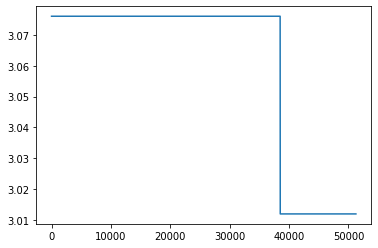

In [39]:
print(y.shape)
print(y[::800].reshape(1,-1))
import numpy as np
print(np.unique(y))
plt.plot(y)

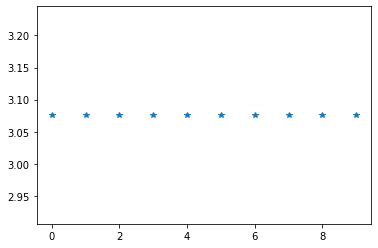

In [36]:
plt.plot(y[0:100:10],'*')

(51264, 1)


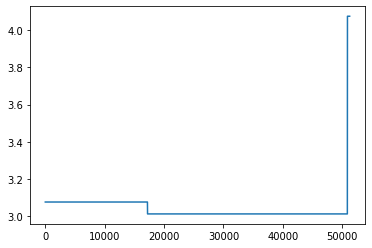

In [25]:
print(y_valid.shape)
plt.plot(y_valid)

In [14]:
print(len(valid_set1))
print(valid_set1[0].shape)
print(valid_set1[1].shape)

print(len(valid_set2))
print(valid_set2[0].shape)
print(valid_set2[1].shape)

2
(1, 512)
(1, 1)
2
(1, 512)
(1, 1)


valid_set1[1]=  [[3.076]]


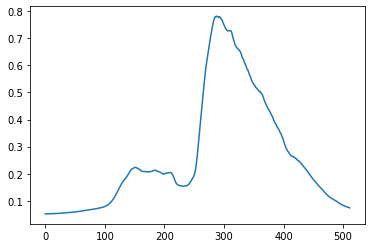

In [20]:
plt.plot(valid_set1[0].T); print("valid_set1[1]= ", valid_set1[1])

valid_set2[1]=  [[3.076]]


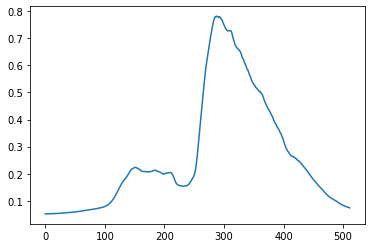

In [21]:
plt.plot(valid_set2[0].T); print("valid_set2[1]= ", valid_set2[1])

In [10]:
print(X.shape)
print(X_valid.shape)
print(y.shape)
print(y_valid.shape)

(51264, 512)
(51264, 512)
(51264, 1)
(51264, 1)


In [32]:
pls_opt = PLSRegression(n_components=6)
# Fir to the entire dataset
pls_opt.fit(X, y)
y_c = pls_opt.predict(X)
# Cross-validation
y_cv = cross_val_predict(pls_opt, X, y, cv=10)
# Calculate scores for calibration and cross-validation
score_c = r2_score(y, y_c)
score_cv = r2_score(y, y_cv)
# Calculate mean squared error for calibration and cross validation
mse_c = mean_squared_error(y, y_c)
mse_cv = mean_squared_error(y, y_cv)
print('R2 calib: %5.3f'  % score_c)
print('R2 CV: %5.3f'  % score_cv)
print('MSE calib: %5.3f' % mse_c)
print('MSE CV: %5.3f' % mse_cv)

y_v = pls_opt.predict(X_valid)
score_vc = r2_score(y_valid, y_v)
print('R2 vali: %5.3f'  % score_vc)

R2 calib: 0.983
R2 CV: 0.932
MSE calib: 0.000
MSE CV: 0.000
R2 vali: 0.008


In [28]:
os.getcwd()

'/content'

In [37]:
!ls "/content/drive/My Drive"

 CNN_book_weixs.pdf			 foo.txt
'Colab Notebooks'			'Getting started.pdf'
 DeepLearningCoursera30Oct19		 mlss2018-madrid-gan-master
 deep-learning-keras-tensorflow-master	 NIR
 Deep-Learning-with-Keras-master	 NLPinTF_coursera29Oct19
 demomcr.ipynb


In [38]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential, save_model, load_model
from keras.callbacks import CSVLogger,ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import six.moves.cPickle as pickle
import gzip
import pandas as pd
import matplotlib.ticker as ticker
from keras.layers.advanced_activations import LeakyReLU
import os
os.chdir(r"/content/drive/My Drive/Colab Notebooks/chemo_SAE-FNN_NIR_HSI_June20/")
###########################################################################################################
#Parameters
###########################################################################################################
encoding_dim = 10                                                 #deep spectral feature dimension.  5,10,20,30,40,50,60,70,80,90 were used in paper
input_dim = 512                                                   #input orginal pixel spectral band number
batch_size = 100                                                  #learning batch of model
nb_epoch = 100                                                    #learning epoch of model
SAEmodelpath="logs/SAEs_model"                                    #save SAE model file path
SAEmodelweightpath="logs/SAEs_model.weights.hdf5"                 #save SAE weight file path
SAEmodeltrainlogpath="logs/SAEs_model.train.log"                  #train log file path
FNNmodelpath="logs/trained_SAE-FNNmodels/SAE-FNN10/FNN_model"     #save SAE-FNN model file path
FNNmodelweightpath="logs/trained_SAE-FNNmodels/SAE-FNN10/FNN_model.weights.hdf5" #save SAE-FNN model weights file path
FNNmodeltrainlogpath="logs/FNNmodel.train.log"                    #train log file path
train_dataset="data/train_pixels/ramdonpixel_train.pkl.gz"        #train dataset 
validation_dataset="data/train_pixels/ramdonpixel_val.pkl.gz"     #validation dataset
meanspectrumdataset="data/Meanspectra.csv"                        #Mean spectra for each sample in both calibration and testing set

###########################################################################################################
#Load data.
###########################################################################################################
with gzip.open(train_dataset, 'rb') as f:
            train_set1, valid_set1 = pickle.load(f)
with gzip.open(validation_dataset, 'rb') as f:
            train_set2, valid_set2= pickle.load(f)
x_train=train_set1[0]  #orginal 51,264 pixel spectra with 512 bands
x_valid=train_set2[0]  #orginal 51,264 pixel spectra with 512 bands
y_train=train_set1[1]  # N content label of spectra
y_valid=train_set2[1]  # N content label of spectra


###########################################################################################################
#Build a SAE model with 512-220-100-encoding_dim-100-220-512
###########################################################################################################
SAEsmodel = Sequential()
SAEsmodel.add(Dense(220, input_dim=input_dim, kernel_initializer='normal', name="dense_1")) #encodeing layer
SAEsmodel.add(LeakyReLU())                                                                      #add active function
SAEsmodel.add(Dense(100, kernel_initializer='normal', name="dense_2"))                      #encodeing layer
SAEsmodel.add(LeakyReLU())                                                                      #add active function
SAEsmodel.add(Dense(encoding_dim, kernel_initializer='normal', name="dense_3"))             #this is the deep feature layer
SAEsmodel.add(LeakyReLU())                                                                      #add active function
SAEsmodel.add(Dense(100, kernel_initializer='normal', name="dense_4"))                      #deconding layer
SAEsmodel.add(LeakyReLU())                                                                      #add active function
SAEsmodel.add(Dense(220, kernel_initializer='normal', name="dense_5"))                      #deconding layer
SAEsmodel.add(LeakyReLU())                                                                      #add active function
SAEsmodel.add(Dense(input_dim, kernel_initializer='normal',name="dense_6"))                 #deconding layer
SAEsmodel.add(LeakyReLU())                                                                      #add active function

#Pre-train SAE model
save_model(SAEsmodel,SAEmodelpath)                                       #Save model
checkpoint = ModelCheckpoint(filepath=SAEmodelweightpath, verbose=0)     #Save weights
csv_logger = CSVLogger(SAEmodeltrainlogpath,separator=',', append=False) #Save train history
SAEsmodel.compile(optimizer='Adam', loss='mean_squared_error')           #loss function MSE, optimizer adam
SAEsmodel.summary() #Show SAEs model struction

#Training
history = SAEsmodel.fit(x_train, x_train,
                nb_epoch=nb_epoch,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_valid, x_valid),
                callbacks=[checkpoint,csv_logger])

###########################################################################################################
#After pre-training SAE, we build SAE-FNN model:512-220-100-encoding_dim-1
###########################################################################################################
###########################################################################################################
#Rebuild SAE model without decoding layers. 
SAEs_FNNmodel = Sequential()
SAEs_FNNmodel.add(Dense(220, input_dim=input_dim, kernel_initializer='normal', name="dense_1"))   
SAEs_FNNmodel.add(LeakyReLU())
SAEs_FNNmodel.add(Dense(100, kernel_initializer='normal', name="dense_2"))
SAEs_FNNmodel.add(LeakyReLU())
SAEs_FNNmodel.add(Dense(encoding_dim, kernel_initializer='normal', name="dense_3")) #this is the deep feature layer
SAEs_FNNmodel.add(LeakyReLU())

#Add a 1 output fully-connected layer to the encoding layer of SAE without active function
SAEs_FNNmodel.add(Dense(1, kernel_initializer='normal', name="FNNlayer"))

#Restore the trained SAE model weights.The learned weights of SAE model will be used as initial weights for SAE-FNN
SAEs_FNNmodel.load_weights(SAEmodelweightpath,by_name=True) 

#build SAE-FNN model 
save_model(SAEs_FNNmodel,FNNmodelpath)
SAEs_FNNmodel.compile(optimizer='Adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

#save SAE-FNN model weights                                                        
checkpoint = ModelCheckpoint(filepath=FNNmodelweightpath, verbose=0)
csv_logger = CSVLogger(FNNmodeltrainlogpath,separator=',', append=False) #Save train history                     
SAEs_FNNmodel.summary()

#Load Dataset.
###########################################################################################################
Meanspectrums = pd.read_csv(meanspectrumdataset,header=0)
x=np.array(Meanspectrums)[:,3:515]   #512 bands of mean spectra
y=np.array(Meanspectrums)[:,2:3]     # N content label

#Divided into calibration and testing set
calibration_x=x[np.where(np.array(Meanspectrums)[:,1] == 1)] # Get 128 calibration_x, dataset value=1
calibration_y=y[np.where(np.array(Meanspectrums)[:,1] == 1)] # Get calibration_y , dataset value=1

#fine-tune the SAE-FNN model
history = SAEs_FNNmodel.fit(calibration_x, calibration_y,
                nb_epoch=11000,
                batch_size=100,
                shuffle=True,
                validation_data=(calibration_x, calibration_y),
                callbacks=[csv_logger])
loss, accuracy = SAEs_FNNmodel.evaluate(calibration_x, calibration_y)
print("finished training of SAE-FNN model, please use SAE-FNNpredict file to get prediction results")


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 220)               112860    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 220)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               22100     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)              

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 51264 samples, validate on 51264 samples
Epoch 1/100
51264/51264 [==============================] - 10s 198us/step - loss: 0.0024 - val_loss: 1.4975e-04
Epoch 2/100
51264/51264 [==============================] - 9s 178us/step - loss: 9.2344e-05 - val_loss: 2.5915e-05
Epoch 3/100
51264/51264 [==============================] - 9s 170us/step - loss: 2.2932e-05 - val_loss: 2.2658e-05
Epoch 4/100
51264/51264 [==============================] - 9s 173us/step - loss: 2.6512e-05 - val_loss: 2.1538e-05
Epoch 5/100
51264/51264 [==============================] - 10s 193us/step - loss: 2.6735e-05 - val_loss: 2.5279e-05
Epoch 6/100
51264/51264 [==============================] - 9s 170us/step - loss: 2.4639e-05 - val_loss: 2.1605e-05
Epoch 7/100
51264/51264 [==============================] - 9s 171us/step - loss: 2.4053e-05 - val_loss: 2.0190e-05
Epoch 8/100
51264/51264 [==============================] - 10s 199us/step - loss: 2.3573e-05 - val_loss: 1.8888e-05
Epoch 9/100
51264/51264 [======

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:121: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Streaming output truncated to the last 5000 lines.
128/128 [==============================] - 0s 235us/step - loss: 0.0647 - accuracy: 0.0000e+00 - val_loss: 0.0740 - val_accuracy: 0.0000e+00
Epoch 8503/11000
128/128 [==============================] - 0s 183us/step - loss: 0.0732 - accuracy: 0.0000e+00 - val_loss: 0.0619 - val_accuracy: 0.0000e+00
Epoch 8504/11000
128/128 [==============================] - 0s 202us/step - loss: 0.0624 - accuracy: 0.0000e+00 - val_loss: 0.0665 - val_accuracy: 0.0000e+00
Epoch 8505/11000
128/128 [==============================] - 0s 212us/step - loss: 0.0646 - accuracy: 0.0000e+00 - val_loss: 0.0841 - val_accuracy: 0.0000e+00
Epoch 8506/11000
128/128 [==============================] - 0s 219us/step - loss: 0.0797 - accuracy: 0.0000e+00 - val_loss: 0.0750 - val_accuracy: 0.0000e+00
Epoch 8507/11000
128/128 [==============================] - 0s 230us/step - loss: 0.0713 - accuracy: 0.0000e+00 - val_loss: 0.0772 - val_accuracy: 0.0000e+00
Epoch 8508/11000
1

In [45]:
from keras.models import Model, Sequential, save_model, load_model
import numpy as np
import matplotlib.pyplot as plt
import six.moves.cPickle as pickle
import gzip
import pandas as pd
import matplotlib.image as mpimg
import glob,os
from sklearn.metrics import r2_score
from sklearn.externals import joblib
from keras.layers.advanced_activations import LeakyReLU, PReLU
def rmse(predictions, targets): #RMSE function for model evaluation
    return np.sqrt(((predictions - targets) ** 2).mean())

##########################################################################################################
#Parameters
##########################################################################################################
FNNmodelpath="logs/trained_SAE-FNNmodels/SAE-FNN10/FNN_model"                          #SAE-FNN model path. (Please change SAE-FNN10 to get different model)
FNNmodelweightpath="logs/trained_SAE-FNNmodels/SAE-FNN10/FNN_model.weights.hdf5"       #SAE-FNN model weights path. (Please change SAE-FNN10 to get different model)
meanspectrumdataset="data/Meanspectra.csv"                                             #192 Mean spectra in both calibration and testing set


###########################################################################################################
#Load Dataset.
###########################################################################################################
Meanspectrums = pd.read_csv(meanspectrumdataset,header=0)
x=np.array(Meanspectrums)[:,3:515]   # 512 bands of mean spectra
y=np.array(Meanspectrums)[:,2:3]     # N content label

#Divided into calibration and testing set
calibration_x=x[np.where(np.array(Meanspectrums)[:,1] == 1)] # Get 128 mean spectra,calibration_x, dataset value=1
calibration_y=y[np.where(np.array(Meanspectrums)[:,1] == 1)] # Get 128 N content, calibration_y 
testing_x=x[np.where(np.array(Meanspectrums)[:,1] == 0)]     # Get 64 mean spectra, testing_x, dataset value=0
testing_y=y[np.where(np.array(Meanspectrums)[:,1] == 0)]     # Get 64 N content,testing_y


###########################################################################################################
#Restore learned SAE-FNN model
###########################################################################################################
SAEs_FNNregression = load_model(FNNmodelpath)
SAEs_FNNregression.load_weights(FNNmodelweightpath)
SAEs_FNNregression.compile(optimizer='adam', loss='mean_squared_error')
SAEs_FNNregression.summary()



###########################################################################################################
#Predict in both calibration and tesing set
###########################################################################################################
#calibration set
Predictclass=SAEs_FNNregression.predict(calibration_x)
#save results
print(calibration_y.shape, Predictclass.shape)
np.savetxt("results/SAE-FNN_calibration_results.csv", np.hstack((calibration_y,Predictclass)), delimiter=",")
#np.savetxt("results/SAE-FNN_calibration_results.csv", Predictclass, delimiter=",")

rmse_val = rmse(calibration_y, Predictclass)      #RMSEC
r2_val = r2_score(calibration_y, Predictclass)    #R2C
RPDc=np.std(calibration_y)/rmse_val*1.0           #RPDC
print("calibration r2 is: " + str(r2_val))
print("calibration rms error is: " + str(rmse_val))
print("calibration RPDc is: " + str(RPDc))

#testing set
Predictclass=SAEs_FNNregression.predict(testing_x)
#save results
np.savetxt("results/SAE-FNN_testing_results.csv", np.hstack((testing_y,Predictclass)), delimiter=",")

rmse_val = rmse(testing_y, Predictclass)       #RMSEP
r2_val = r2_score(testing_y, Predictclass)     #R2P
RPDp=np.std(testing_y)/rmse_val*1.0            #RPDp

print(" prediction r2 is: " + str(r2_val))
print(" prediction rms error is: " + str(rmse_val))
print(" calibration RPDp is: " + str(RPDp))


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 220)               112860    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 220)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               22100     
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 10)                0         
_________________________________________________________________
FNNlayer (Dense)             (None, 1)                

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
